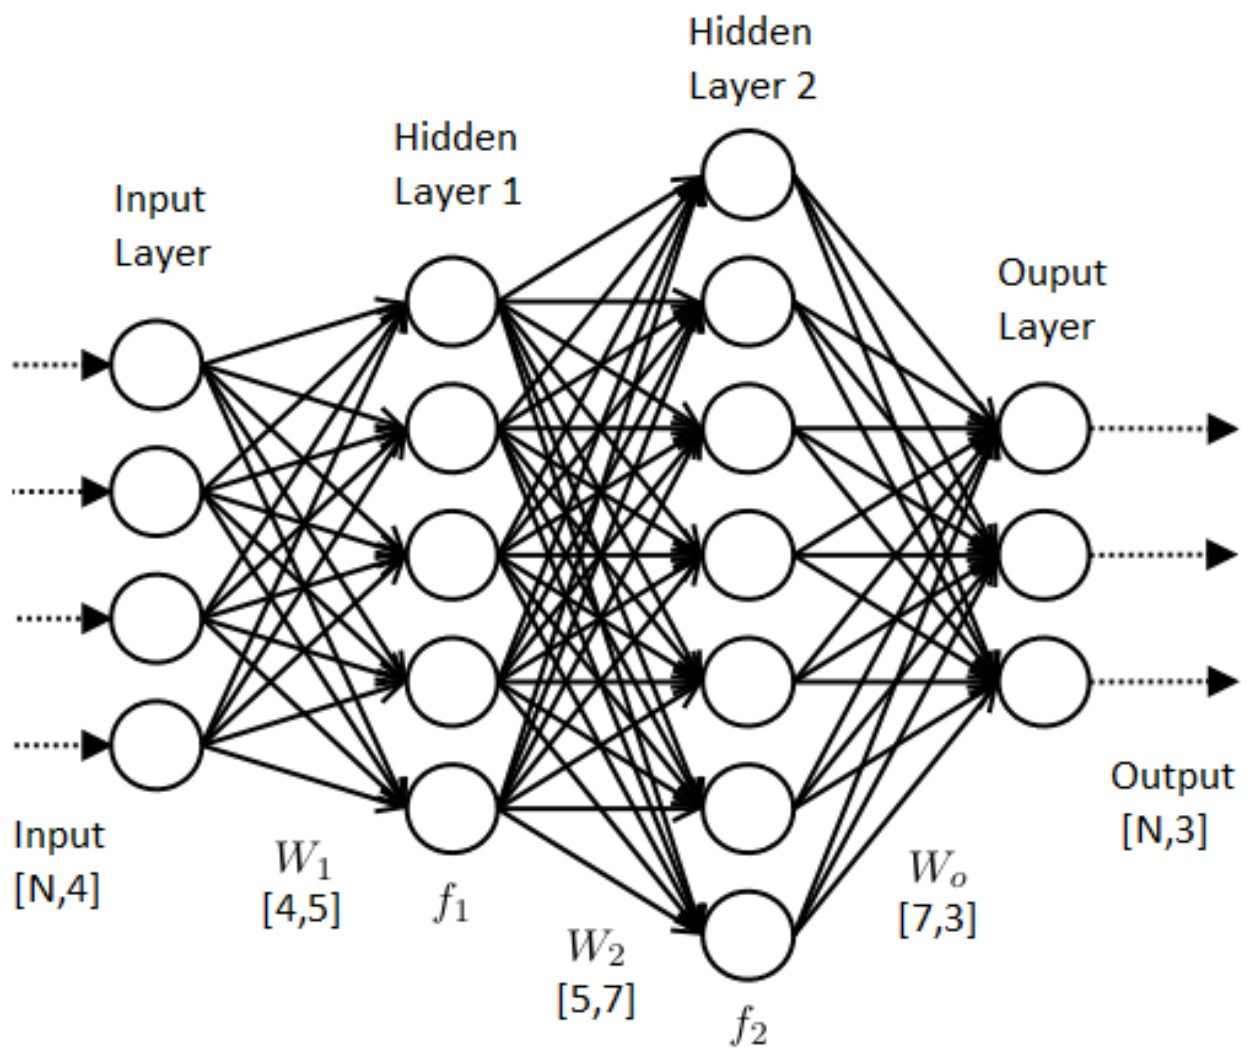

In [ ]:
class Foncteur():
    def __init__(self):
        pass
    
    def __call__(self,x):
        return x+2
    
def a23(x):
    return Foncteur()


f=Foncteur()
print(f(2))


# _make_layer(architecture): fonction qui return un foncteur, comme a23 dans l'exemple. cad que je dois faire _make_layer(architecture)(x) pour avoir l'output du modèle (avec x qui passe dedans). D'où le features = _make_layer(architecture), donc features(x) = output

class Reseau_neurones(nn.Module): # on met entre () le nom de la class mère
    def __init__(self, vgg_name): # Pour créer l'objet, j'ai toujours besoin d'un self + pour un réseau de neurone, l'architecture de ce-dernier
        super(Reseau_neurones, self).__init__() # à chaque fois que je créé une classe, je dois avoir un __init__. Il faut avoir les attributs de la classe en question. Ce super appelle le parent de l'objet, on lui donne la classe de cet objet, et l'objet (self). Ensuite, on appelle __init__ qui est une méthode de la classe mère.
        self.features = self._make_layers(cfg[vgg_name]) # Il faut définir les attributs avec self.qqch=qqch. Il faut appeler les attributs et méthodes avec self pour qu'il sache qu'il accède à une propriété de l'objet
        self.classifier = nn.Linear(512, 10) # on aurait pu le mettre dans _make_layers. On l'a mise là parce que ce n'est pas "typique" aux VGG.
# nn.Linear return aussi un Foncteur. 
        
# en python, tous les attributs, toutes les méthodes sont publics. Pour les rendre "privé", on doit mettre "_" devant. Exemple pour _make_layers qui est privé! Donc on ne peut pas appeler .make_layer. En revanche, pas vraiment "privé" car on peut appeler ._make_layer.
    
    def forward(self, x): # quand on créé une classe qui hérite de nn.Module, on doit toujours avoir forward, car c'est la fonction qui est appelé quand on fait outputs=Reseau_neurone(inputs). Il n'y a pas besoin de faire Reseau_neurone.forward(input). C'est une méthode abstraite.
        out = self.features(x) # car features est un foncteur
        out = out.view(out.size(0), -1) # on transforme notre objet de dim 32x32x3 en objet de dim 1 (ligne)
        out = self.classifier(out) # car classifier est un foncteur
        # out = torch.nn.functional.softmax(out) # Pas besoin vu qu'on utilise la cross entropy comme loss. Uniquement si on utilisait le min likelihood.
        return out

    def _make_layers(self, cfg):
        layers = []
        in_channels = 3
        for x in cfg:
            if x == 'M':
                layers += [nn.MaxPool2d(kernel_size=2, stride=2)]
            else:
                layers += [nn.Conv2d(in_channels, x, kernel_size=3, padding=1),
                           nn.BatchNorm2d(x),
                           nn.ReLU(inplace=True)]
                in_channels = x
        layers += [nn.AvgPool2d(kernel_size=1, stride=1)]
        return nn.Sequential(*layers) 
    
    
# Quand j'appelle mon Reseau_neurone, j'ai pas besoin de faire Reseau_neurone.forward(x), mais juste Reseau_neurone(x), car forward méthode abstraite.